# Task 3: Visualization

# Superstore Dataset – Description
The Superstore dataset is a popular sample dataset used extensively for teaching data analysis, data visualization, and business intelligence concepts. It contains detailed information about customer orders for a fictional retail company that sells office supplies, furniture, and technology products across various regions.

| Column                                                | Description                                              |
| ----------------------------------------------------- | -------------------------------------------------------- |
| Row ID                                             | Unique identifier for each row (not useful for analysis) |
| Order ID`, `Customer ID`, `Product ID`               | Keys for tracking orders, customers, and products        |
| Order Date`, `Ship Date`                             | Useful for time series analysis                          |
| Customer Name`, `Segment`, `Region`, `State`, `City` | For demographic-based segmentation                       |
| Category`, `Sub-Category`, `Product Name`            | Product-based grouping                                   |
| Sales`, `Quantity`, `Discount`, `Profit`             | **Core metrics** for business analytics                  |


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Configure visuals
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load the dataset
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')


In [4]:
# Preview data
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [5]:
# -----------------------------
# 1. Basic Data Cleaning
# -----------------------------
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])


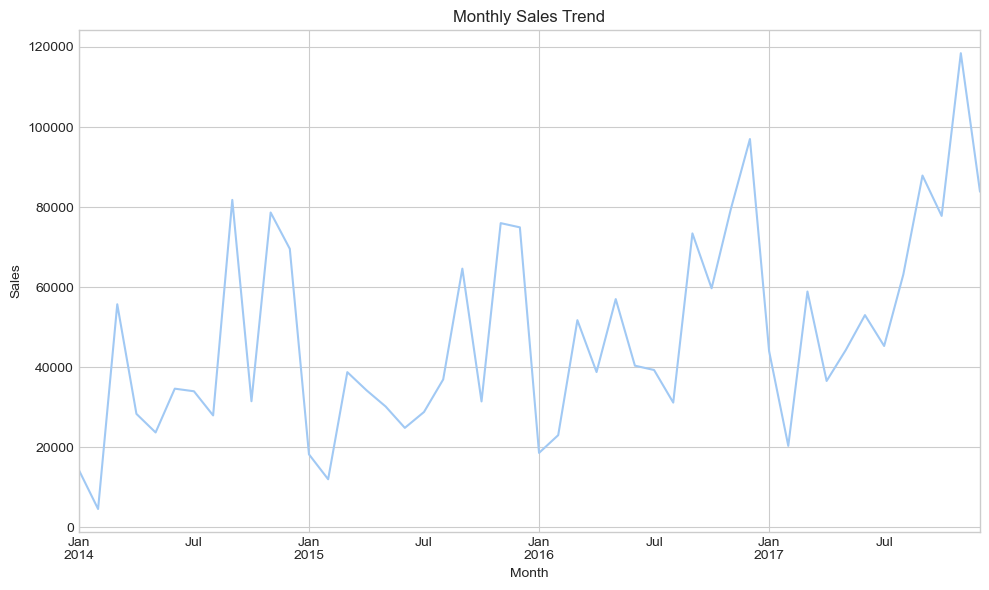

In [6]:
# -----------------------------
# 2. Sales Over Time (Line Plot)
# -----------------------------
monthly_sales = df.resample('M', on='Order_Date')['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


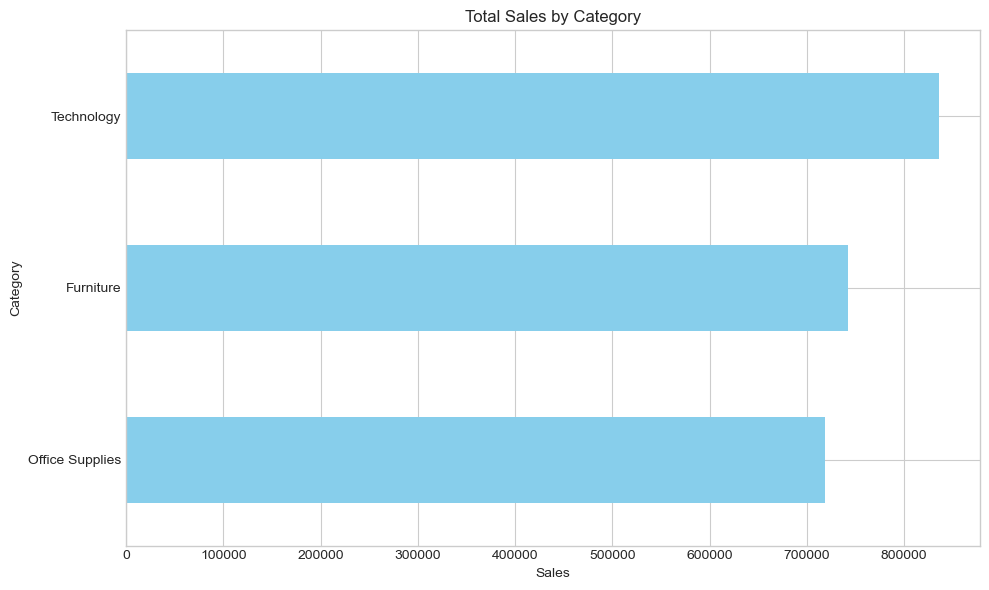

In [7]:
# -----------------------------
# 3. Sales by Category (Bar Plot)
# -----------------------------
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure()
category_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


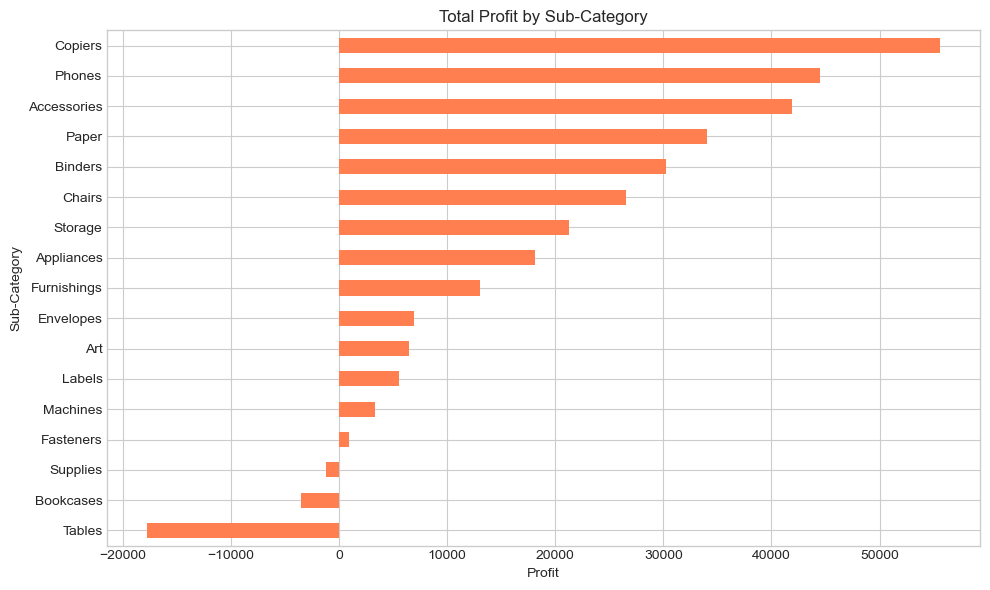

In [8]:
# -----------------------------
# 4. Profit by Sub-Category (Bar Plot)
# -----------------------------
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure()
subcat_profit.plot(kind='barh', color='coral')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

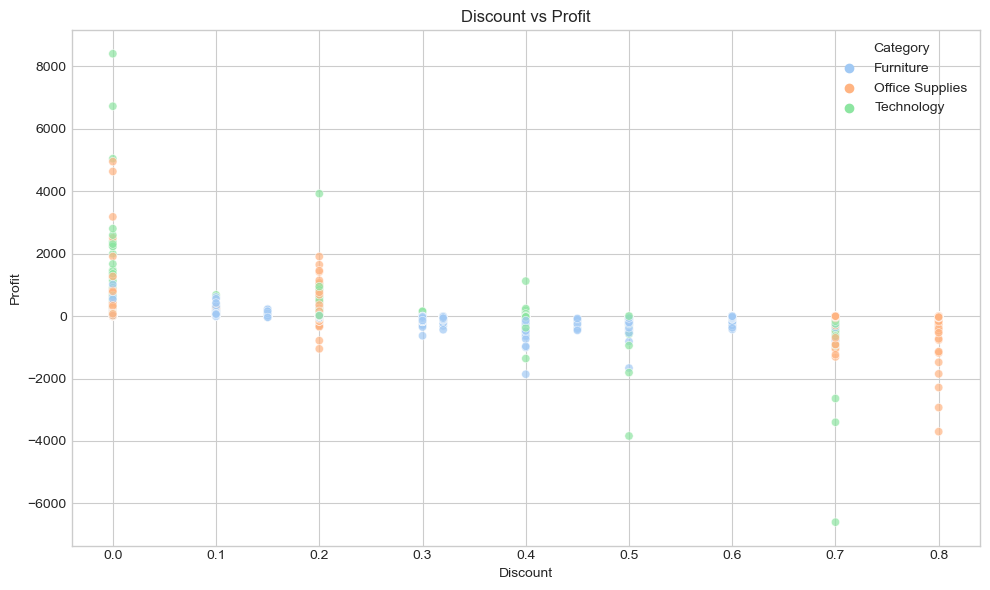

In [9]:

# -----------------------------
# 5. Discount vs Profit (Scatter Plot)
# -----------------------------
plt.figure()
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', alpha=0.7)
plt.title('Discount vs Profit')
plt.tight_layout()
plt.show()

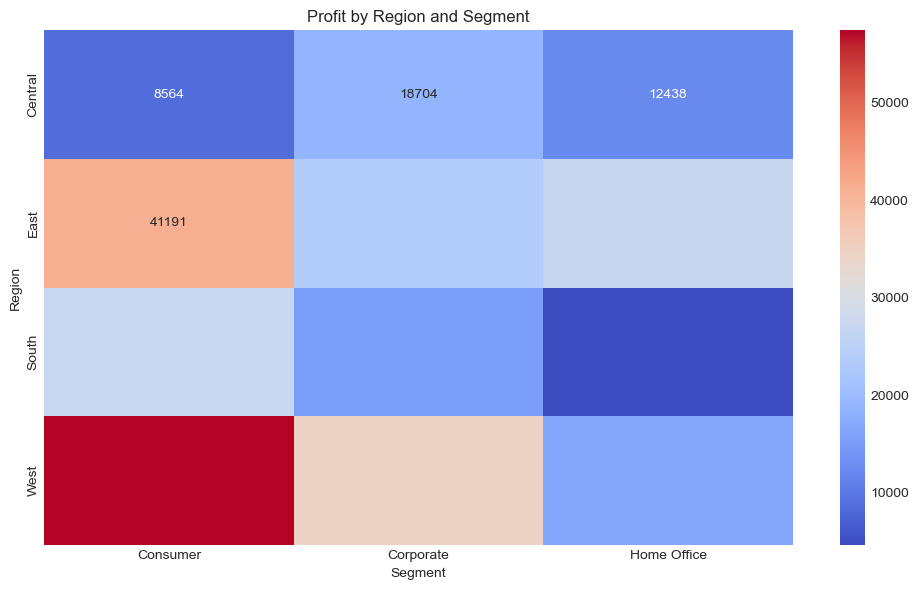

In [10]:
# -----------------------------
# 6. Heatmap: Profit by Region and Segment
# -----------------------------
heatmap_data = df.pivot_table(values='Profit', index='Region', columns='Segment', aggfunc='sum')

plt.figure()
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Profit by Region and Segment')
plt.tight_layout()
plt.show()

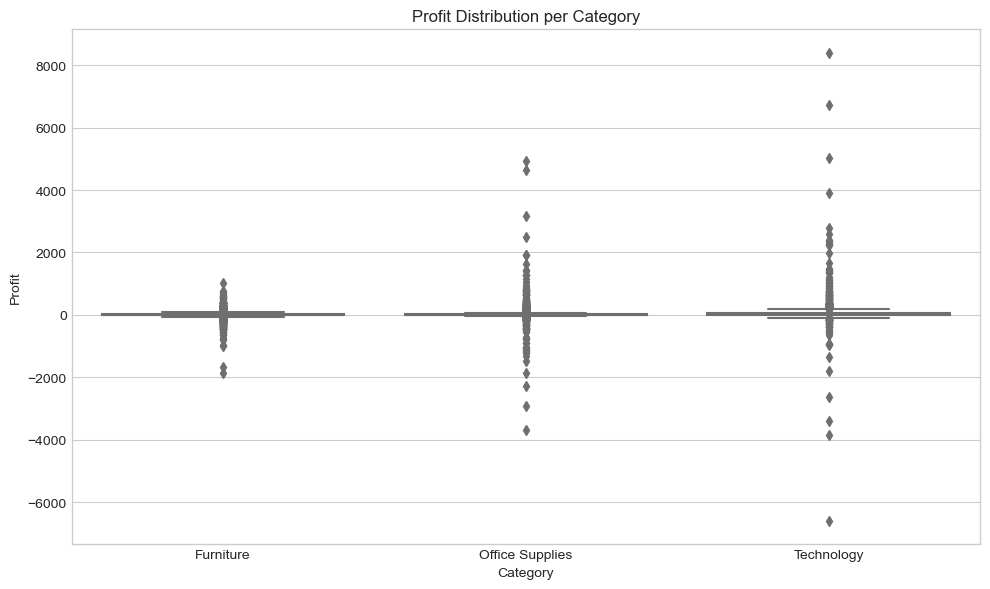

In [11]:
# -----------------------------
# 7. Boxplot: Profit Distribution by Category
# -----------------------------
plt.figure()
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution per Category')
plt.tight_layout()
plt.show()

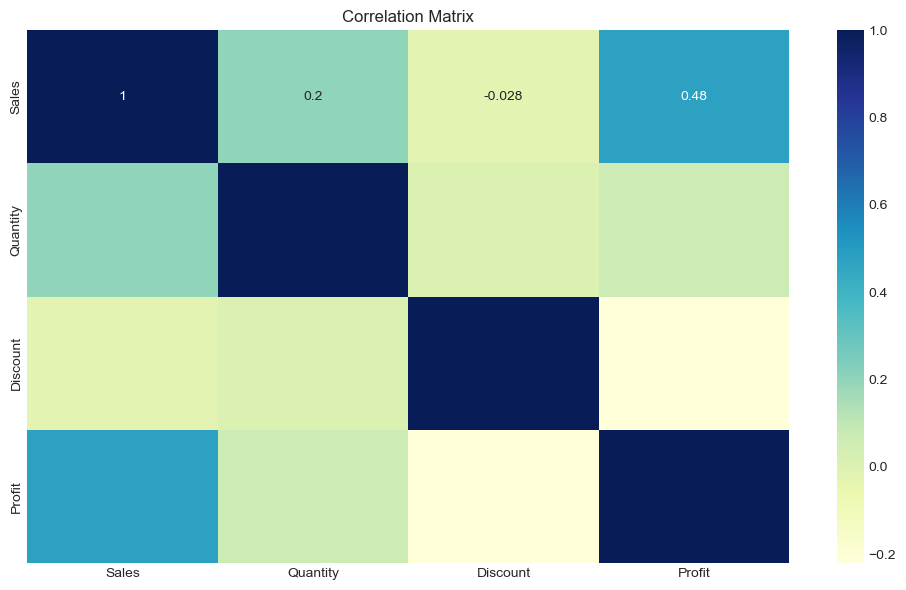

In [12]:
# -----------------------------
# 8. Correlation Heatmap
# -----------------------------
plt.figure()
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


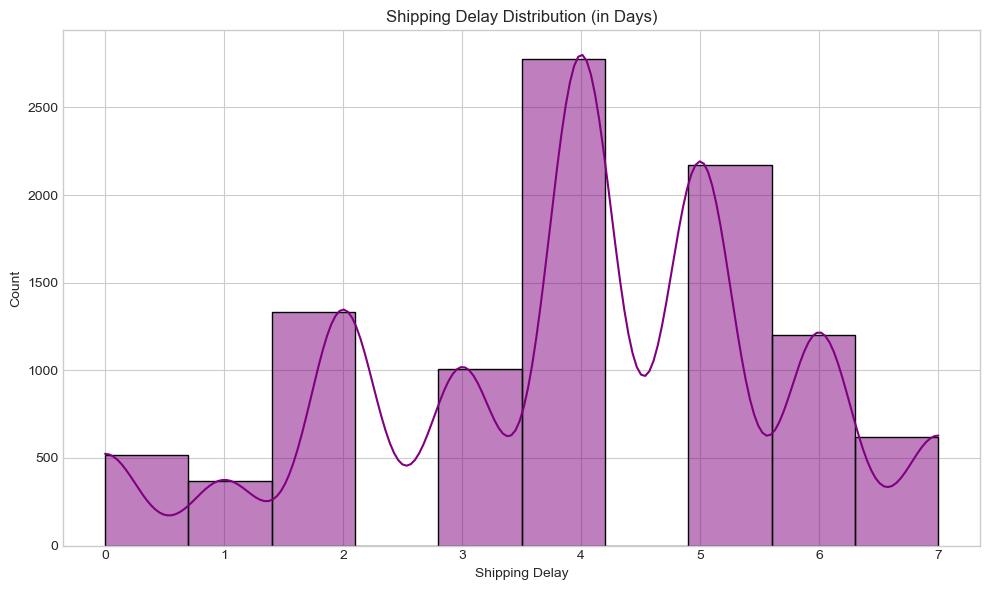

In [13]:
# -----------------------------
# 9. Shipping Delay (Histogram)
# -----------------------------
df['Shipping_Delay'] = (df['Ship_Date'] - df['Order_Date']).dt.days

plt.figure()
sns.histplot(df['Shipping_Delay'], bins=10, kde=True, color='purple')
plt.title('Shipping Delay Distribution (in Days)')
plt.xlabel('Shipping Delay')
plt.tight_layout()
plt.show()

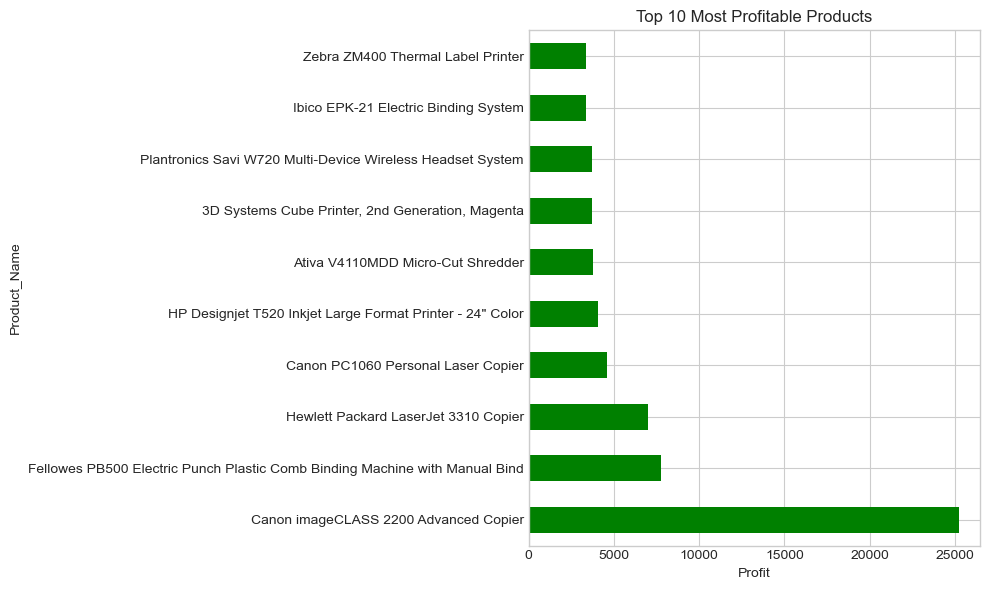

In [14]:
# -----------------------------
# 10. Top 10 Products by Profit
# -----------------------------
top_products = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()
